# Auto_TS : Auto_TimeSeries
+ **Créez automatiquement plusieurs modèles de séries chronologiques à l'aide d'une seule ligne de code. Maintenant mis à jour avec `Dask`.**

<img src = "https://github.com/AutoViML/Auto_TS/blob/master/images/logo.png?raw=true"/>

+ **`auto_timeserie`s est un utilitaire de création de modèles complexe pour les données de séries chronologiques. Puisqu'il automatise de nombreuses tâches impliquées dans une entreprise complexe, il assume de nombreux paramètres par défaut intelligents. Mais vous pouvez les changer. `Auto_Timeseries` créera rapidement des modèles prédictifs basés sur `les modèles Statsmodels ARIMA, Seasonal ARIMA, Prophet et Scikit-Learn ML`. Il sélectionnera automatiquement le meilleur modèle qui donne le meilleur score spécifié.**

In [ ]:
!pip install git+https://github.com/AutoViML/Auto_TS.git --user

In [1]:
import pandas as pd
import sys
import os
dev = False  # Set to false when using production version of library
if dev:
    # Path to Dev version of autots library
    sys.path.append(os.environ['DEV_AUTOTS'])
    %load_ext autoreload
    %autoreload 2

from auto_ts import auto_timeseries

Imported auto_timeseries version:0.0.90. Call by using:
model = auto_timeseries(score_type='rmse',
        time_interval='M', non_seasonal_pdq=None, seasonality=False,
        seasonal_period=12, model_type=['best'], verbose=2, dask_xgboost_flag=0)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



In [2]:
filename1 = 'Sales_and_Marketing.csv'
dataset = pd.read_csv(filename1, engine='python')
print(dataset.shape)
dataset.head()

(48, 3)


,Time Period,Sales,Marketing Expense
0,2011-01-01,397,486.64
1,2011-02-01,400,501.80
2,2011-03-01,498,437.09
3,2011-04-01,536,565.16
4,2011-05-01,596,744.15


In [3]:
ts_column = 'Time Period'
target = 'Sales'
sep = ','

In [4]:
FORECAST_PERIOD = 12

In [5]:
model = auto_timeseries(score_type='rmse',
                time_interval='M',
                non_seasonal_pdq=None, seasonality=False, seasonal_period=12,
                model_type=['ML'],
                verbose=2)

In [6]:
num = 44

In [7]:
traindata = dataset[:num]
testdata = dataset[num:]
print(traindata.shape, testdata.shape)

(44, 3) (4, 3)


Start of Fit.....
    Target variable given as = Sales
Start of loading of data.....
    Inputs: ts_column = Time Period, sep = ,, target = ['Sales']
    Using given input: pandas dataframe...
    Time Period column exists in given train data...
    train data shape = (44, 2)
    detected strf_time_format as %Y-%m-%d in train data. You can change it in setup if this is incorrect.
setting maxlag to a low number = 5

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 5 regression: c autolag: BIC
Results of Augmented Dickey-Fuller Test:
+-----------------------------+------------------------------+
|                             | Dickey-Fuller Augmented Test |
+-----------------------------+------------------------------+
|        Test Statistic       |     -1.7308612698009107      |
|           p-value           |      0.4152860439298812      |
|          #Lags Used         |             0.0              |
| Number of Observations Used |             43.0             |
|    

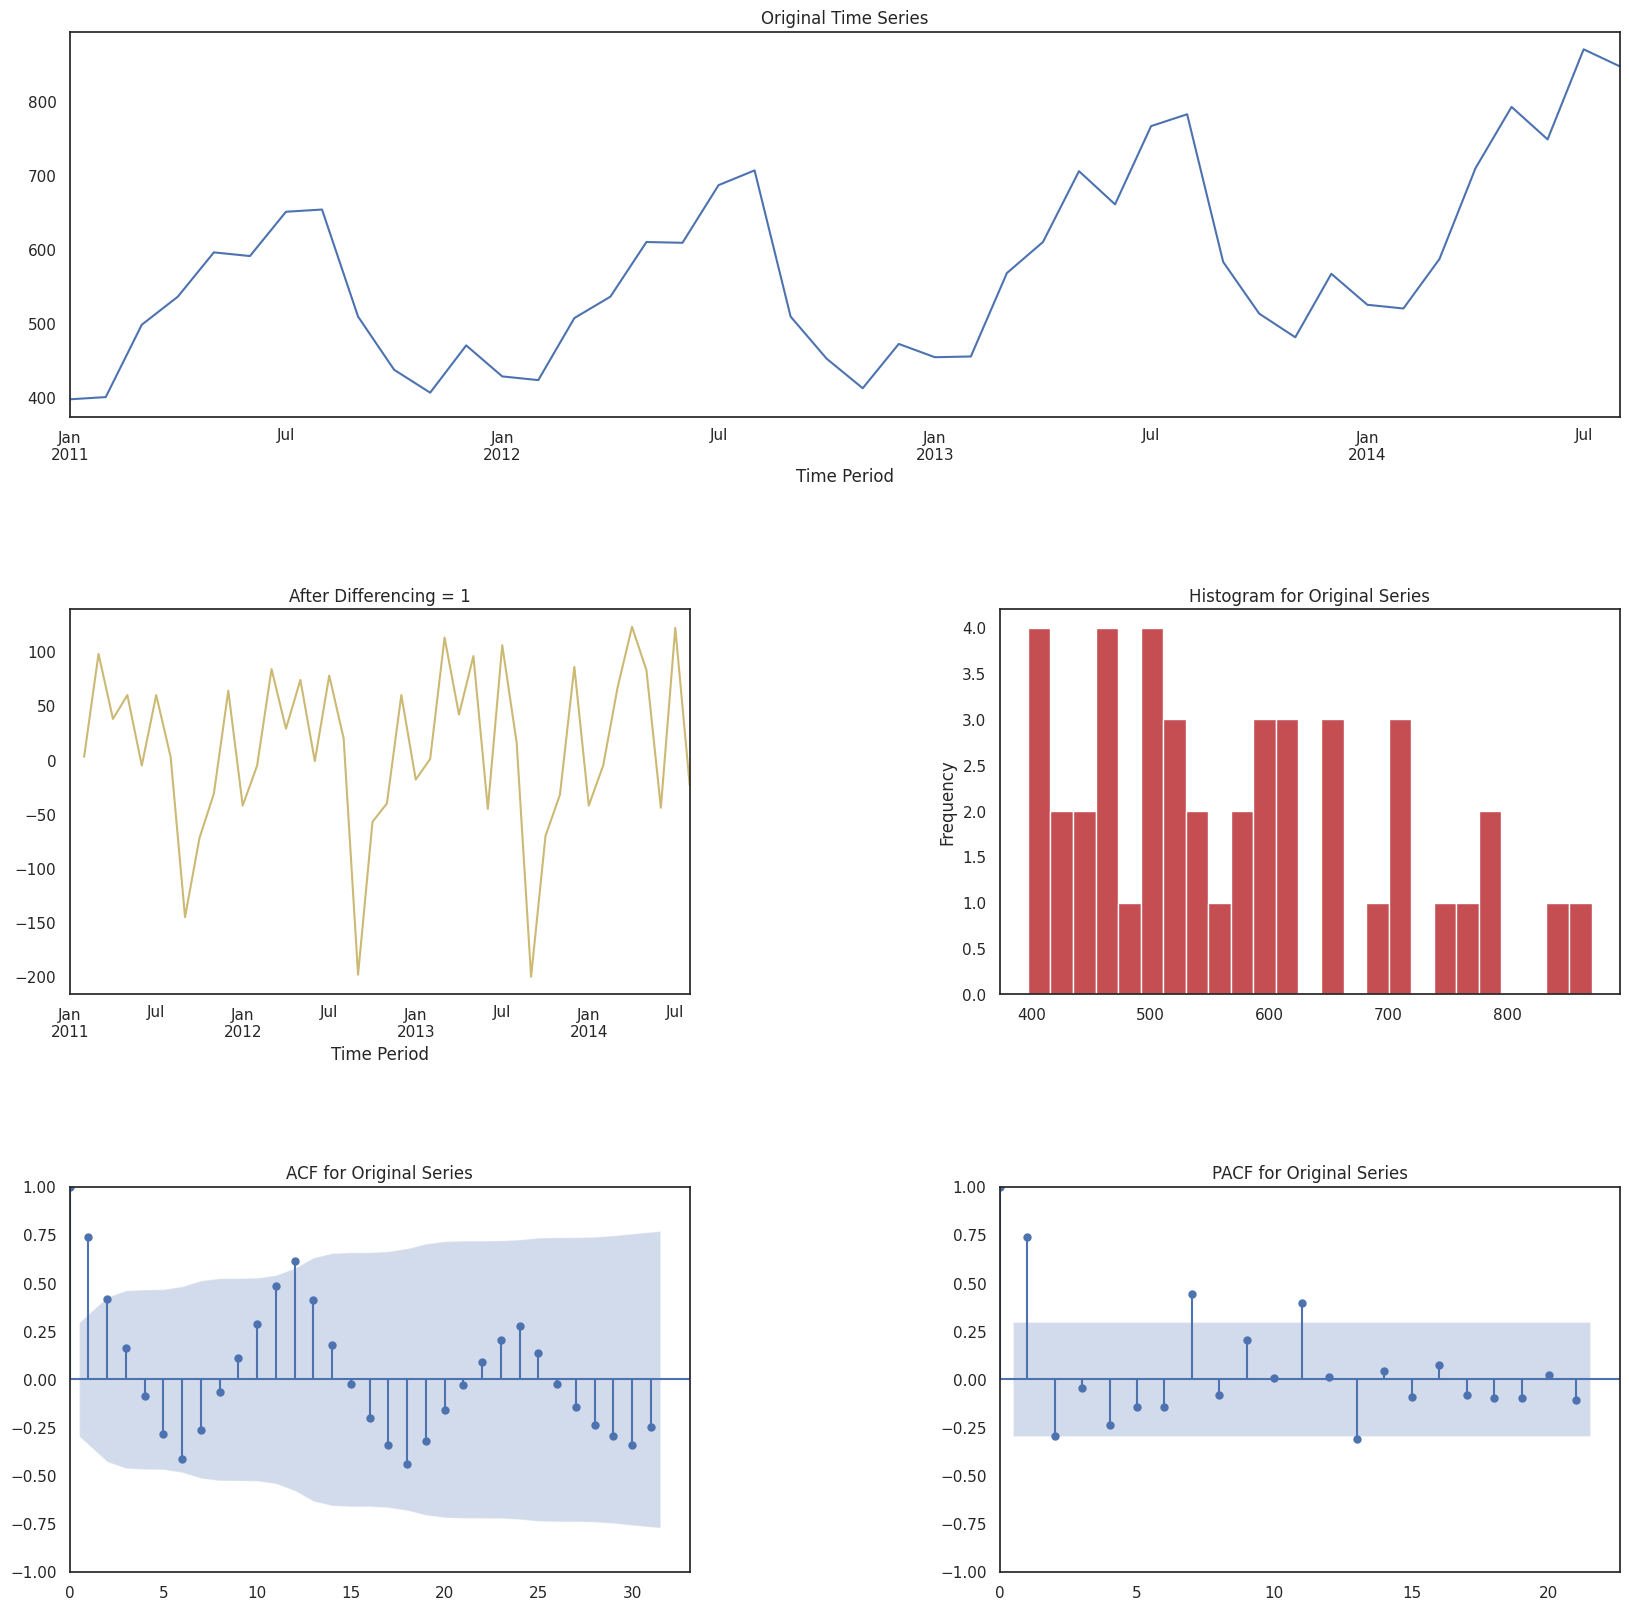

Time Interval is given as M
    Correct Time interval given as a valid Pandas date-range frequency...


Building ML Model



Running Machine Learning Models...

Creating 2 lagged variables for Machine Learning model...
    You have set lag = 3 in auto_timeseries setup to feed prior targets. You cannot set lags > 10 ...
### Be careful setting dask_xgboost_flag to True since dask is unstable and doesn't work sometime's ###
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    1 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

########### Single-Label Regression Model Tuning and Training Started ####

Fitting ML model
    13 variables used in training ML model = ['Marketing Expense(t)', 'Marketing Expense(t-1)', 'Sales(t-1)', 'Time Period_hour', 'Time Period_minute', 'Time Period_dayofweek', 'Time Period_quarter', 'Time Period_month', 'Time Period_year', 'Time 

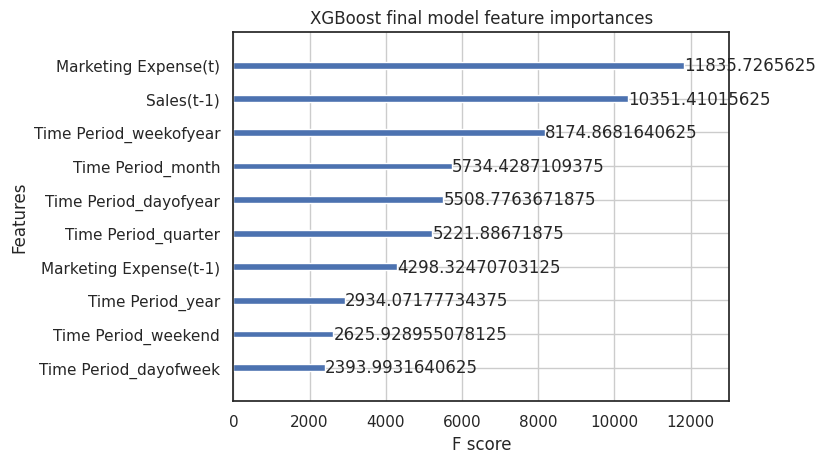

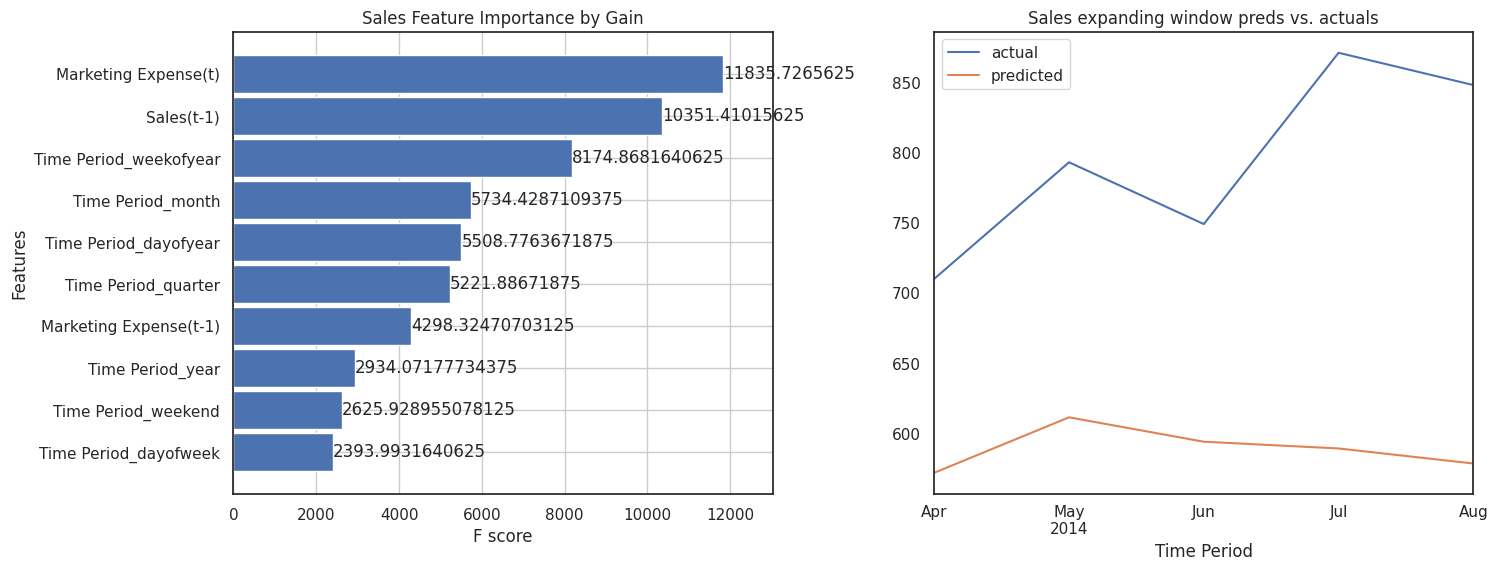

In [8]:
model.fit(
    traindata=traindata,
    # traindata=file_path,  # Alternately, you can specify the file directly
    ts_column=ts_column,
    target=target,
    cv=3,
    sep=sep)

In [9]:
model.get_leaderboard()

,name,rmse
0,ML,213.622614


<Axes: xlabel='Model', ylabel='CV Scores'>

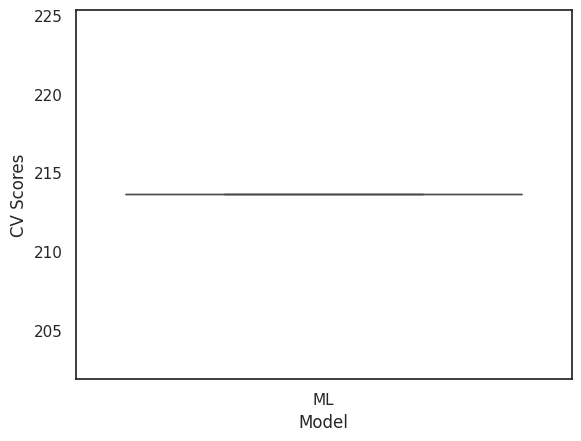

In [10]:
model.plot_cv_scores()

In [11]:
# Make sure all models have the same number of CV folds
model.get_cv_scores()

,Model,CV Scores
0,ML,213.622614


In [12]:
results_dict = model.get_ml_dict()

In [13]:
results_dict['Prophet']['forecast']

defaultdict(<function auto_ts.auto_timeseries.fit.<locals>.<lambda>()>, {})

In [14]:
results_dict['auto_SARIMAX']['forecast']

defaultdict(<function auto_ts.auto_timeseries.fit.<locals>.<lambda>()>, {})

In [15]:
results_dict['ML']['forecast']

[array([[571.8699 ],
        [611.3584 ],
        [593.9826 ],
        [589.17896],
        [578.47076]], dtype=float32)]

In [16]:
testdata['preds'] = model.predict(testdata, model='ML', simple=False)['yhat'].values

Predicting using test dataframe shape = (4, 3) for ML model
For large datasets: ML predictions will take time since it has to predict each row and use that for future predictions...
    Using given input: pandas dataframe...
    Alert: No strf_time_format given for Time Period. Provide strf_time format during "setup" for better results.
ML predictions completed


<Axes: >

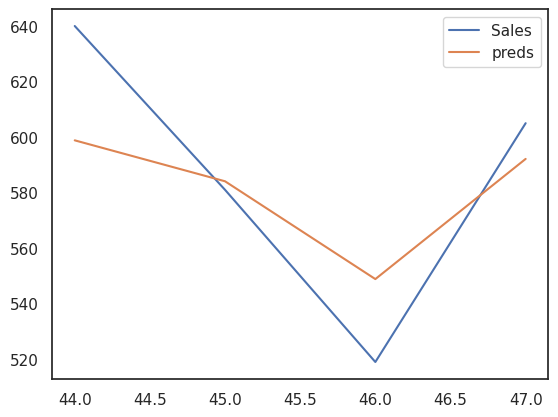

In [17]:
testdata[[target, 'preds']].plot()

In [18]:
testdata

,Time Period,Sales,Marketing Expense,preds
44,2014-09-01,640,718.98,598.827087
45,2014-10-01,581,570.30,584.081299
46,2014-11-01,519,527.60,548.860840
47,2014-12-01,605,559.75,592.139648


In [19]:
# Using Best Model
future_predictions = model.predict(
    testdata=FORECAST_PERIOD
)

Predicting using forecast period=12 as input for ML model
For large datasets: ML predictions will take time since it has to predict each row and use that for future predictions...
(Error) Testdata must be pandas dataframe for ML model. No predictions will be made.


In [27]:
# Using specific model
future_predictions = model.predict(
    testdata=FORECAST_PERIOD,
    model='auto_SARIMAX'
)

Predicting using forecast period=12 as input for ML model
(Error) Model of type 'auto_SARIMAX' does not exist. Check inputs and try again.


In [28]:
# Using specific model
future_predictions = model.predict(
    testdata=FORECAST_PERIOD,
    model='Prophet',
    simple=False

)

Predicting using forecast period=12 as input for ML model
(Error) Model of type 'Prophet' does not exist. Check inputs and try again.


In [29]:
future_predictions

In [30]:
model.get_best_model()

In [31]:
xgb_model = model.get_model('ML')

In [32]:
xgb_model

In [33]:
import pickle
file_name = "xgb_reg.pkl"

# save
pickle.dump(xgb_model, open(file_name, "wb"))

In [34]:
# load
xgb_model_loaded = pickle.load(open(file_name, "rb"))
dataset['yhat'] = model.predict(dataset, model='ML', simple=False)['yhat'].values

Predicting using test dataframe shape = (48, 3) for ML model
For large datasets: ML predictions will take time since it has to predict each row and use that for future predictions...
    Using given input: pandas dataframe...
    Alert: No strf_time_format given for Time Period. Provide strf_time format during "setup" for better results.
ML predictions completed


<Axes: >

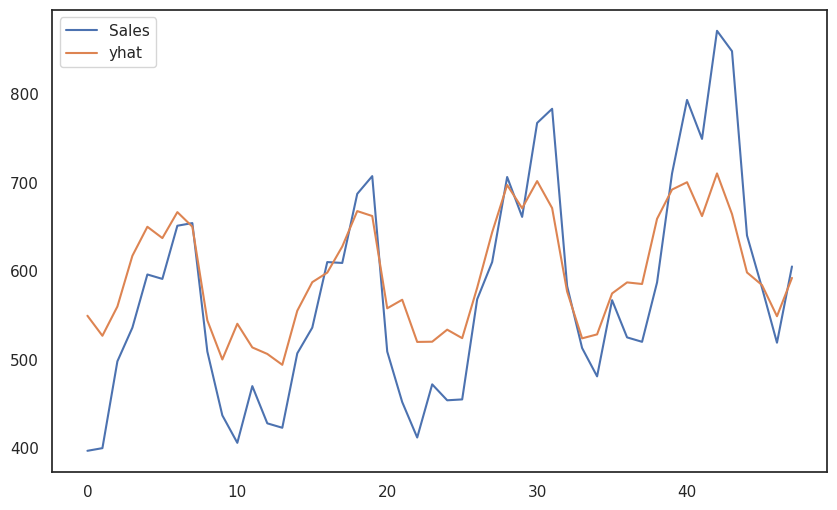

In [35]:
dataset[[target,'yhat']].plot(figsize=(10,6))